In [1]:
import mne
import os

subject =  'pilot7'
session = '01'
folder = fr'C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-{subject}\ses-{session}\eeg'

tmin = 0
tmax = 0
raws = list()

metadatas = list()
for file in os.listdir(folder):
    if file.endswith('.fif'):
        file_path = os.path.join(folder, file)
        raw = mne.io.read_raw_fif(file_path)
        raw.pick_types(eeg=True, stim=False)
        tmin = tmax
        tmax = tmax + raw.times[-1]
        metadata = dict()
        metadata['tmin'] = tmin
        metadata['tmax'] = tmax
        metadata['subject'] = file.split('_')[0].split('-')[1]
        metadata['session'] = file.split('_')[1].split('-')[1]
        metadata['task'] = file.split('_')[2].split('-')[1]
        metadata['run'] = file.split('_')[3].split('-')[1]
        if metadata['task'] in ['baseline', 'neurofeedback', 'restingstate', 'transfert']:
            metadatas.append(metadata)
            raws.append(raw)
metadatas

Opening raw data file C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-pilot7\ses-01\eeg\sub-pilot7_ses-01_task-baseline_run-01_desc-BrainAmpSeries-Dev_1-raw.fif...
Isotrak not found
    Range : 0 ... 17249 =      0.000 ...    34.498 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Opening raw data file C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-pilot7\ses-01\eeg\sub-pilot7_ses-01_task-baseline_run-02_desc-BrainAmpSeries-Dev_1-raw.fif...
Isotrak not found
    Range : 0 ... 17299 =      0.000 ...    34.598 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Opening raw data file C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-pilot7\ses-01\eeg\sub-pilot7_ses-01_task-baseline_run-03_desc-BrainAmpSeries-Dev_1-raw.fif...
Isotrak not found
    Range : 0 ... 17249 =      0.000 ...    34.498 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Opening raw data file 

[{'tmin': 0,
  'tmax': 34.498,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '01'},
 {'tmin': 34.498,
  'tmax': 69.096,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '02'},
 {'tmin': 69.096,
  'tmax': 103.594,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '03'},
 {'tmin': 103.594,
  'tmax': 138.09199999999998,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '04'},
 {'tmin': 138.09199999999998,
  'tmax': 172.69,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '05'},
 {'tmin': 172.69,
  'tmax': 207.188,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '06'},
 {'tmin': 207.188,
  'tmax': 241.786,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '07'},
 {'tmin': 241.786,
  'tmax': 276.384,
  'subject': 'pilot7',
  'session': '01',
  'task': 'baseline',
  'run': '08'},
 {'tmin': 276.384,
  'tmax': 310.882,
  'subje

In [2]:
raw = mne.concatenate_raws(raws, preload=True)
raw.filter(1, 40)
raw.notch_filter([50, 100])
raw.set_montage('standard_1020')

C:\Users\victor.ferat\AppData\Local\Temp\ipykernel_55356\5893710.py:1: RuntimeWarning: raw files do not all have the same data format, could result in precision mismatch. Setting raw.orig_format="unknown"
  raw = mne.concatenate_raws(raws, preload=True)


Filtering raw data in 28 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 28 contiguous segments
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenua

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,35 points
Good channels,32 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


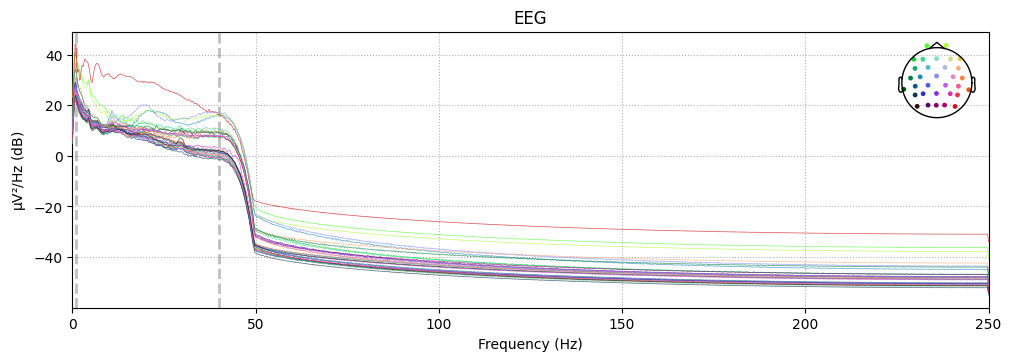

In [3]:
%matplotlib qt
raw.copy().set_eeg_reference('average').plot_psd()

In [4]:
raw.plot(precompute=False, scalings='auto')

Using qt as 2D backend.


Channels marked as bad:
['PO10']


In [5]:
raw.save(f'sub-{subject}_ses-{session}_annotated-raw.fif', overwrite=True)

Writing C:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot7_ses-01_annotated-raw.fif
Closing C:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot7_ses-01_annotated-raw.fif
[done]


In [6]:
from mne.preprocessing import ICA

rank = mne.compute_rank(raw)

ica = ICA(n_components=rank['eeg'], random_state=42, method='infomax', fit_params=dict(extended=True))
ica.fit(raw)



Computing rank from data with rank=None
Omitting 10110 of 1112000 (0.91%) samples, retaining 1101890 (99.09%) samples.
    Using tolerance 1.3e-10 (2.2e-16 eps * 31 dim * 1.8e+04  max singular value)
    Estimated rank (eeg): 31
    EEG: rank 31 computed from 31 data channels with 0 projectors
Fitting ICA to data using 31 channels (please be patient, this may take a while)
Omitting 10110 of 1112000 (0.91%) samples, retaining 1101890 (99.09%) samples.
Selecting by number: 31 components
Computing Extended Infomax ICA
Fitting ICA took 251.7s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (1101890 samples)
ICA components,31
Available PCA components,31
Channel types,eeg
ICA components marked for exclusion,—


In [7]:
%matplotlib qt
ica.plot_components(inst=raw)

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x731 with 11 Axes>]

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


In [8]:
ica.plot_sources(inst=raw) #gbhfgh

Creating RawArray with float64 data, n_channels=31, n_times=1112000
    Range : 0 ... 1111999 =      0.000 ...  2223.998 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated


In [9]:
raw_ica = ica.apply(raw.copy())
raw_ica.interpolate_bads()
raw_ica.set_eeg_reference('average')

Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 4 ICA components
    Projecting back using 31 PCA components
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 97.0 mm
Computing interpolation matrix from 31 sensor positions
Interpolating 1 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,35 points
Good channels,32 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 10110 of 1112000 (0.91%) samples to NaN, retaining 1101890 (99.09%) samples.
Effective window size : 4.096 (s)


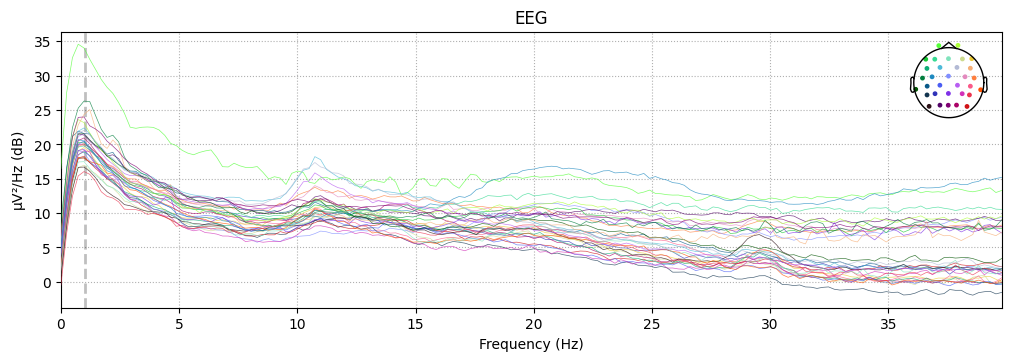

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [10]:
raw_ica.plot_psd(fmin=0, fmax=40)

In [11]:
raw_ica.save(fr'sub-{subject}_ses-{session}_annotated-preproc-raw.fif', overwrite=True)

Writing C:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot7_ses-01_annotated-preproc-raw.fif
Closing C:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-pilot7_ses-01_annotated-preproc-raw.fif
[done]


In [12]:
import mne
import numpy as np
# Define the electrodes of interest
electrodes_OI_right = ['P4', 'P8', 'O2']
electrodes_OI_left = ['P3', 'P7', 'O1']
freqs = [8, 13]
# Compute the alpha power on average for the specified electrodes
duration = 2

psds = list()
for metadata in metadatas:
    raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmax'])
    epochs_ = mne.make_fixed_length_epochs(raw_, duration=duration, overlap=0.5, preload=False)
    tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_right), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
    alpha_power_right = np.average(np.average(tf[0], axis=2), axis=1)

    tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_left), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
    alpha_power_left = np.average(np.average(tf[0], axis=2), axis=1)

    metadata['alpha_power_right_dist'] = alpha_power_right
    metadata['alpha_power_left_dist'] = alpha_power_left
    metadata['alpha_power_right'] = np.average(alpha_power_right)
    metadata['alpha_power_left'] = np.average(alpha_power_left)
    
    for right, left  in zip(alpha_power_right, alpha_power_left):
        p = {'power': right - left,
            'side': 'right - left',
             'run': metadata['run'],
             'task': metadata['task']}
        psds.append(p)


Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 1000 original time points ...
0 bad epochs dropped
Effective window size : 0.512 (s)
Using data from preloaded Raw for 22 events and 1000 original time points ...
Effective window size : 0.512 (s)
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 1000 original time points ...
5 bad epochs dropped
Effective window size : 0.512 (s)
Using data from preloaded Raw for 17 events and 1000 original time points ...
Effective window size : 0.512 (s)
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 22 events and 1000 original time points ...
12 bad epochs dropped
Effective window size : 0.512 (s)
Using data from preloaded Raw for 10 events and 1000 origi

ValueError: tmax (2251.038) must be less than or equal to the max time (2223.9980 s)

In [16]:
import pandas as pd
df = pd.DataFrame(psds)
df

,power,side,run,task
0,3.696796e-13,right - left,01,baseline
1,-3.820554e-12,right - left,01,baseline
2,-8.900856e-12,right - left,01,baseline
3,4.950172e-13,right - left,01,baseline
4,-1.212033e-12,right - left,01,baseline
...,...,...,...,...
1183,1.761787e-12,right - left,12,neurofeedback
1184,-5.058617e-13,right - left,12,neurofeedback
1185,7.212444e-12,right - left,12,neurofeedback
1186,-4.217412e-12,right - left,12,neurofeedback


In [17]:
import dabest
import matplotlib.pyplot as plt

analysis_of_long_df = dabest.load(df, idx=("baseline", "neurofeedback"),
                                   x="task", y="power")


In [18]:
import matplotlib.pyplot as plt

runs = ['01', '02', '03', '04', '05', '06']
fig, axes = plt.subplots(1, len(runs), figsize=(30, 10),  sharey=True)

for i, run in enumerate(runs):
        data = df[df['run'] == run]
        analysis = dabest.load(data, idx=("baseline", "neurofeedback"), x="task", y="power")
        analysis.mean_diff.plot(ax=axes[i], group_summaries='mean_sd', color_col="task", es_marker_size=1)

plt.show()


c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:563: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rawdata_axes.set_xticklabels(ticks_with_counts)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:563: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rawdata_axes.set_xticklabels(ticks_with_counts)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:563: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rawdata_axes.set_xticklabels(ticks_with_counts)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:563: UserWarning: set_ticklabels() should only be used with a fixed num

In [19]:
df['task_run'] = df['task'] + '_' + df['run']
df

,power,side,run,task,task_run
0,3.696796e-13,right - left,01,baseline,baseline_01
1,-3.820554e-12,right - left,01,baseline,baseline_01
2,-8.900856e-12,right - left,01,baseline,baseline_01
3,4.950172e-13,right - left,01,baseline,baseline_01
4,-1.212033e-12,right - left,01,baseline,baseline_01
...,...,...,...,...,...
1183,1.761787e-12,right - left,12,neurofeedback,neurofeedback_12
1184,-5.058617e-13,right - left,12,neurofeedback,neurofeedback_12
1185,7.212444e-12,right - left,12,neurofeedback,neurofeedback_12
1186,-4.217412e-12,right - left,12,neurofeedback,neurofeedback_12


In [20]:
df['task_run'].unique()

array(['baseline_01', 'baseline_02', 'baseline_03', 'baseline_04',
       'baseline_05', 'baseline_06', 'baseline_07', 'baseline_08',
       'baseline_09', 'baseline_10', 'baseline_11', 'baseline_12',
       'baseline_13', 'baseline_14', 'baseline_15', 'neurofeedback_01',
       'neurofeedback_02', 'neurofeedback_03', 'neurofeedback_04',
       'neurofeedback_05', 'neurofeedback_06', 'neurofeedback_07',
       'neurofeedback_08', 'neurofeedback_09', 'neurofeedback_10',
       'neurofeedback_11', 'neurofeedback_12'], dtype=object)

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:473: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 35.3% of the points

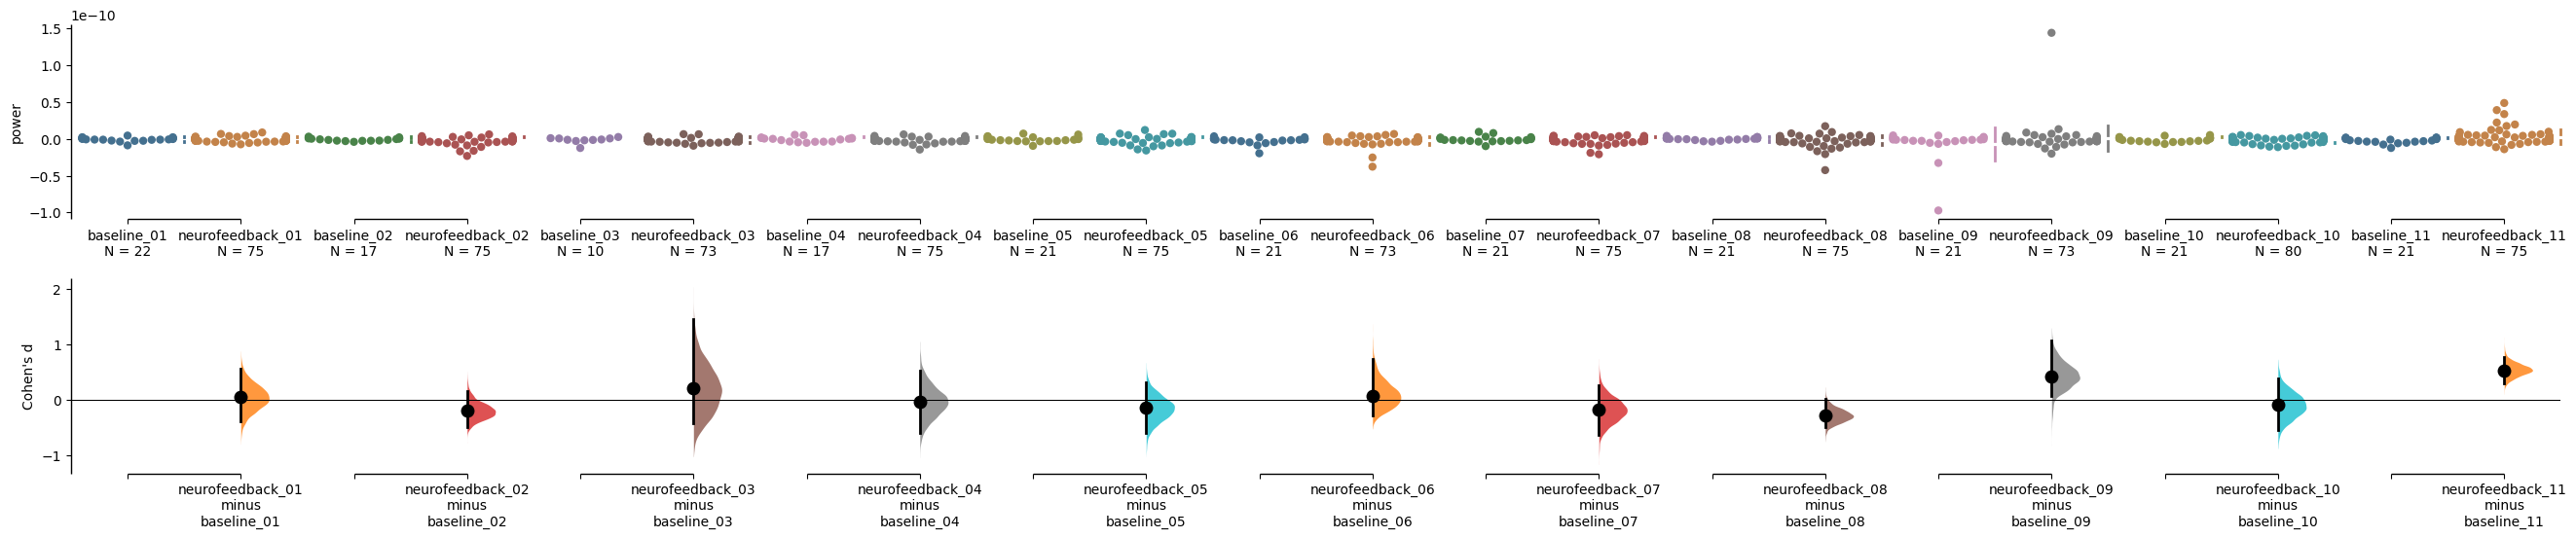

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

In [23]:
idx = [(f"baseline_{i:02d}", f"neurofeedback_{i:02d}") for i in range(1, 12)]

unpaired = dabest.load(data = df,
                          idx=idx,
                          x="task_run", y="power")

unpaired.cohens_d.plot()